<a href="https://colab.research.google.com/github/etckanikama/AyameClassification/blob/main/AyameClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# GOAL：アヤメのがく片や花びら幅や長さの数値を用いてアヤメの種類を分類する
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [19]:
# データセットのダウンロード
# trainとtestを分割してくれる
# 線形svmを使うのでLinearSVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

In [9]:
# インスタンスを作成
dataset = load_iris()
# データの中身確認=数値が書かれた150x4の二次元配列
print("データ")
print(dataset.data)
print(dataset.data.shape)


# 0,1,2と書かれた150x1の一次次元配列
#0,1,2は花の種類:setosa,versicolor,virginica 
print("予測するデータ")
print(dataset.target)
print(dataset.target.shape)
print(dataset.target_names)


予測するデータ
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
(150,)
['setosa' 'versicolor' 'virginica']


In [17]:
#数値が書かれた150x4の二次元配列を学習用と予測用に振り分けて、どれが予測するデータの0,1,2に対応するか検証する 
# formatを日本語でも中央に揃えてくれるように変更
pd.set_option('display.unicode.east_asian_width',True)
# 配列をデータフレームに変換するpandas
# data：DataFrameの第一引数、第二引数にカラム名
dataset_data = pd.DataFrame(dataset.data, columns=["がく片の長さ","がく片の幅","花びらの長さ","花びらの幅"])
dataset_target = pd.DataFrame(dataset.target, columns=["花の種類"])
# 行axis=0,列axis=1
# 今回は列（横）に花の種類を追加したいのでaxis=1
dataset_all = pd.concat([dataset_data,dataset_target],axis=1)
print(dataset_all.head(10))
# 平均値や最小値などすべてを表示してくれる便利なメソッド
print(dataset_all.describe())


   がく片の長さ  がく片の幅  花びらの長さ  花びらの幅  花の種類
0           5.1         3.5           1.4         0.2         0
1           4.9         3.0           1.4         0.2         0
2           4.7         3.2           1.3         0.2         0
3           4.6         3.1           1.5         0.2         0
4           5.0         3.6           1.4         0.2         0
5           5.4         3.9           1.7         0.4         0
6           4.6         3.4           1.4         0.3         0
7           5.0         3.4           1.5         0.2         0
8           4.4         2.9           1.4         0.2         0
9           4.9         3.1           1.5         0.1         0
       がく片の長さ  がく片の幅  花びらの長さ  花びらの幅    花の種類
count    150.000000  150.000000    150.000000  150.000000  150.000000
mean       5.843333    3.057333      3.758000    1.199333    1.000000
std        0.828066    0.435866      1.765298    0.762238    0.819232
min        4.300000    2.000000      1.000000    0.100000    0.00000

In [28]:
# train_test_split関数を使う
# データセットのテストの比率を1/3 = 0.33
data_train, data_test,target_train, target_test = train_test_split(dataset_data, dataset_target,test_size=0.33)

print(data_test.head(10))

     がく片の長さ  がく片の幅  花びらの長さ  花びらの幅
50            7.0         3.2           4.7         1.4
27            5.2         3.5           1.5         0.2
89            5.5         2.5           4.0         1.3
124           6.7         3.3           5.7         2.1
20            5.4         3.4           1.7         0.2
5             5.4         3.9           1.7         0.4
123           6.3         2.7           4.9         1.8
87            6.3         2.3           4.4         1.3
99            5.7         2.8           4.1         1.3
117           7.7         3.8           6.7         2.2


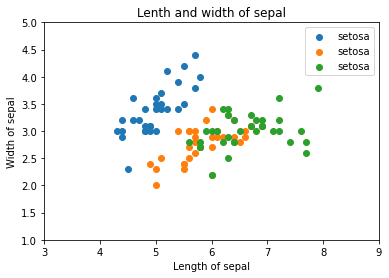

In [32]:
# データを可視化する
# がく片の長さ
# print(target_train)
plt.scatter(data_train[target_train["花の種類"]==0]["がく片の長さ"],data_train[(target_train == 0).values]["がく片の幅"],label="setosa",cmap="rgb")
plt.scatter(data_train[target_train["花の種類"]==1]["がく片の長さ"],data_train[(target_train == 1).values]["がく片の幅"],label="setosa",cmap="rgb")
plt.scatter(data_train[target_train["花の種類"]==2]["がく片の長さ"],data_train[(target_train == 2).values]["がく片の幅"],label="setosa",cmap="rgb")

# x軸の範囲指定
plt.xlim(3,9)
# y軸の範囲指定
plt.ylim(1,5)
# x軸の名前
plt.xlabel("Length of sepal")
# y軸の名前
plt.ylabel("Width of sepal")

# グラフのタイトル
plt.title("Lenth and width of sepal")
# 凡例を出力
plt.legend()


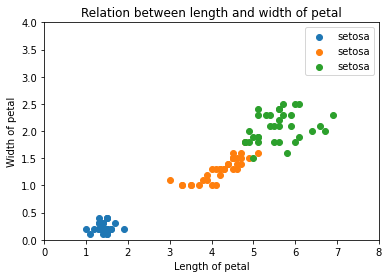

In [34]:
# 花びら
plt.scatter(data_train[target_train["花の種類"]==0]["花びらの長さ"],data_train[(target_train == 0).values]["花びらの幅"],label="setosa",cmap="rgb")
plt.scatter(data_train[target_train["花の種類"]==1]["花びらの長さ"],data_train[(target_train == 1).values]["花びらの幅"],label="setosa",cmap="rgb")
plt.scatter(data_train[target_train["花の種類"]==2]["花びらの長さ"],data_train[(target_train == 2).values]["花びらの幅"],label="setosa",cmap="rgb")

plt.xlim(0,8)
plt.ylim(0,4)

plt.xlabel("Length of petal")
plt.ylabel("Width of petal")

plt.title("Relation between length and width of petal")
plt.legend()

In [ ]:
# 機械学習アルゴリズムの実装
